In [1]:
import numpy as np
import sys
sys.path.append('../../')
from src.utils import gen_tree
from collections import  Counter
import scipy
import os
import time

In [2]:
def construct_complete_tree(depth):
    """
        the root node is of depth 1 and begin with index 0
    """
    p = 2 ** depth - 1
    nodes_list = [[i] for i in range(p)]
    nodes_relation_dict = {}
    working_lst = [0]
    candiate_lst = []
    for i in range(depth, 1, -1):
        while len(working_lst) > 0:
            working_node = working_lst.pop(0)
            left_child = working_node + 1
            right_child = left_child + 2**(i-1) - 1
            nodes_relation_dict[working_node] = [left_child, right_child]
            candiate_lst.append(left_child)
            candiate_lst.append(right_child)
        working_lst = candiate_lst
        candiate_lst = []
    return p, nodes_list, nodes_relation_dict
        

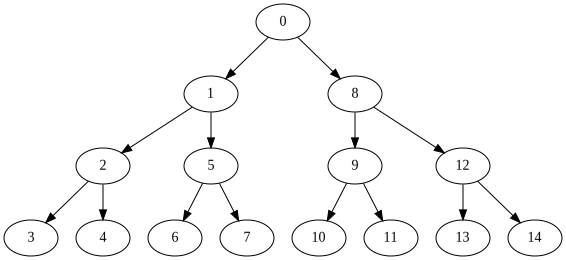

In [3]:
p, nodes_list, nodes_relation_dict = construct_complete_tree(4)
penalty = 0.1     
weights = np.ones((p,))
groups, tree, dot = gen_tree(nodes_list, nodes_relation_dict, penalty=penalty, weights=None)
dot.attr(bgcolor='transparent', ratio="compress")
dot 

In [4]:
grp_size_lst = [len(g) for g in groups]
Counter(grp_size_lst)

Counter({15: 1, 7: 2, 3: 4, 1: 8})

# Data

In [5]:
ROOT = f"{os.path.expanduser('~')}/db"
for depth in range(11, 16):
    print("Working on depth: ", depth, end="|")
    start = time.time()
    p = 2 ** depth - 1
    X = scipy.sparse.random(2*p, p, density=0.1, format='csr', dtype=np.float64, random_state=2023)
    y = np.random.random((2*p,1))
    data = {'X': X, 'y': y}
    np.save(f"{ROOT}/ls_dep:{depth}_num:{2}x_sparse:{0.1}.npy", data)
    end = time.time() - start
    print(" Time Elapsed: ", end)
    

Working on depth:  11| Time Elapsed:  0.3415489196777344
Working on depth:  12| Time Elapsed:  8.90082049369812
Working on depth:  13| Time Elapsed:  36.419602394104004
Working on depth:  14| Time Elapsed:  71.91576361656189
Working on depth:  15| Time Elapsed:  252.54030346870422


In [21]:
np.load(f"{ROOT}/ls_dep:{11}_num:{2}x_sparse:{0.1}.npy", allow_pickle=True).item()['y'].shape

(4094, 1)

In [18]:
f"{ROOT}/ls_dep:{depth}_num:{2}x_spare:{0.1}.npy"

'/home/yutong/db/ls_dep:11_num:2x_spare:0.1.npy'